### Лабораторна робота #1
### МІТ-31 Кульчицького Дмитра


### **Стовпці = ["x1", "x3", "x6", "x9"]**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sea

import warnings
warnings.filterwarnings('ignore')

In [35]:
numbers = pd.read_csv("practice1_data.csv")
numbers.head(12)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,classes
0,2.163950,0.015729,-1.136593,2.182571,-1.552051,-0.909067,1.791084,-1.094894,0.308272,-0.912365,0
1,1.364464,-1.359741,-1.881798,-0.484231,-1.974301,-0.017010,2.184909,-1.012308,-0.774774,-3.702803,0
2,1.237133,0.945965,-0.008633,0.889645,0.348132,-1.863290,-1.093229,0.057705,1.646754,-0.834884,2
3,0.530019,2.739019,1.168152,-0.182967,-0.313546,1.274500,1.097952,-0.909685,1.490564,2.300722,1
4,-1.169403,-0.387841,0.049067,-2.136358,-1.839488,-0.635955,-0.136341,0.357952,-0.376029,-2.323494,2
5,2.632567,-2.187044,-2.877435,1.214570,-0.932406,-1.751738,-0.371274,-1.623788,-0.593950,0.666200,0
6,0.414880,-0.157428,1.192164,1.315924,-1.487844,-1.530894,-1.467259,2.600887,0.714335,-0.527407,2
7,0.696428,2.336794,0.937671,-1.408921,0.986726,1.651799,2.112990,-1.268736,0.751079,3.482437,0
8,-2.011219,-0.851366,1.213547,1.393759,0.387996,1.605899,2.790490,1.318649,-2.263388,-0.265534,2
9,-0.584189,-3.062913,-1.940569,-0.740922,-0.147745,-0.961257,1.870423,-0.814882,-2.945417,-1.376556,0


In [36]:
numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x1       1500 non-null   float64
 1   x2       1500 non-null   float64
 2   x3       1500 non-null   float64
 3   x4       1500 non-null   float64
 4   x5       1500 non-null   float64
 5   x6       1500 non-null   float64
 6   x7       1500 non-null   float64
 7   x8       1500 non-null   float64
 8   x9       1500 non-null   float64
 9   x10      1500 non-null   float64
 10  classes  1500 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 129.0 KB


In [37]:
dropCollumns = ["x2", "x4", "x5", "x7", "x8", "x10"]

for i in range(len(dropCollumns)):
    numbers=numbers.drop(dropCollumns[i], axis=1)
numbers.describe()


,x1,x3,x6,x9,classes
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.550329,-0.383910,0.042072,-0.083342,1.497333
std,1.489842,1.390968,1.013082,1.623737,1.117807
min,-4.857101,-4.554755,-3.667087,-5.973969,0.000000
25%,-0.437339,-1.364413,-0.644789,-1.167791,0.000000
50%,0.601106,-0.462918,0.057803,-0.119206,1.000000
75%,1.566922,0.522196,0.752421,0.886031,2.000000
max,5.147879,4.930330,3.363034,6.945688,3.000000


In [38]:
numbers["classes"].value_counts()

0    376
2    376
1    375
3    373
Name: classes, dtype: int64

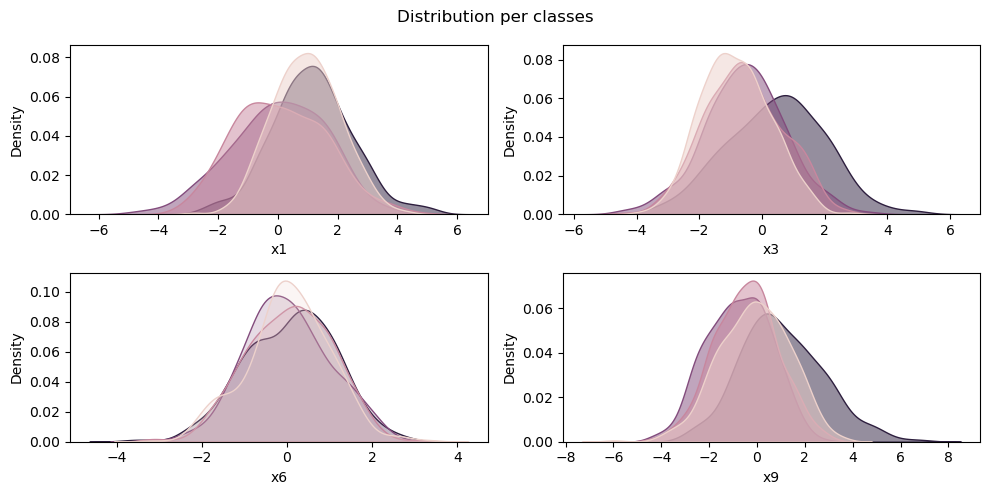

In [39]:
fig, axes = mat.subplots(2, 2, figsize=(10,5), dpi = 100)
fig.suptitle('Distribution per classes')

def Kdeplot(axes, data, label, hue, alpha):
    sea.kdeplot(ax = axes, data = data, x = label, hue = hue, alpha = alpha, shade = True)
    axes.set_xlabel(label)
    axes.get_legend().remove()

Kdeplot(axes[0,0], numbers, "x1", "classes", 0.5)
Kdeplot(axes[0,1], numbers, "x3", "classes", 0.5)
Kdeplot(axes[1,0], numbers, "x6", "classes", 0.2)
Kdeplot(axes[1,1], numbers, "x9", "classes", 0.5)

mat.tight_layout()

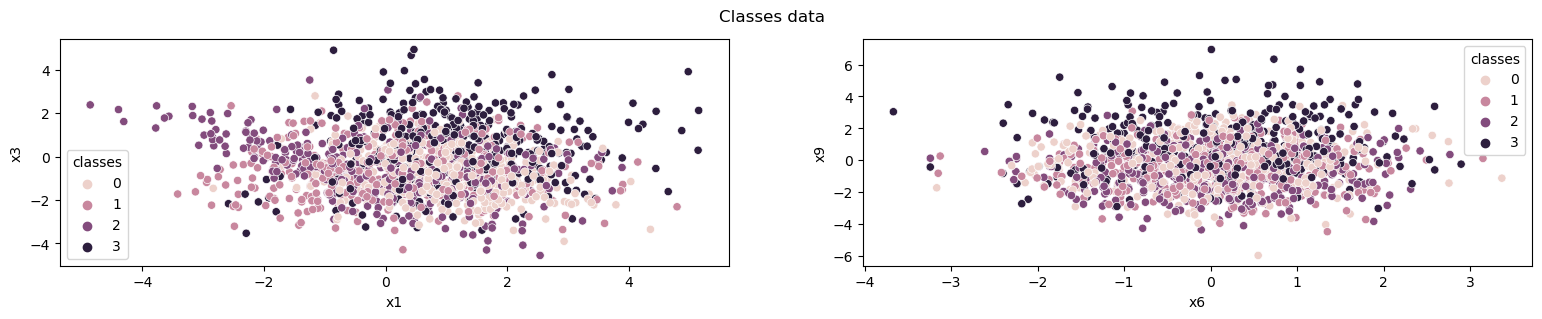

In [40]:
fig, axes = mat.subplots(1, 2, figsize=(19,3), dpi = 100)
fig.suptitle("Classes data")


def Scatterplot(axes, data, x, y, hue):
    sea.scatterplot(ax=axes, data = data, x = x, y = y, hue = hue)
    axes.set_xlabel(x)
    axes.set_ylabel(y)


Scatterplot(axes[0], numbers, 'x1', 'x3', "classes")
Scatterplot(axes[1], numbers, 'x6', 'x9', "classes")


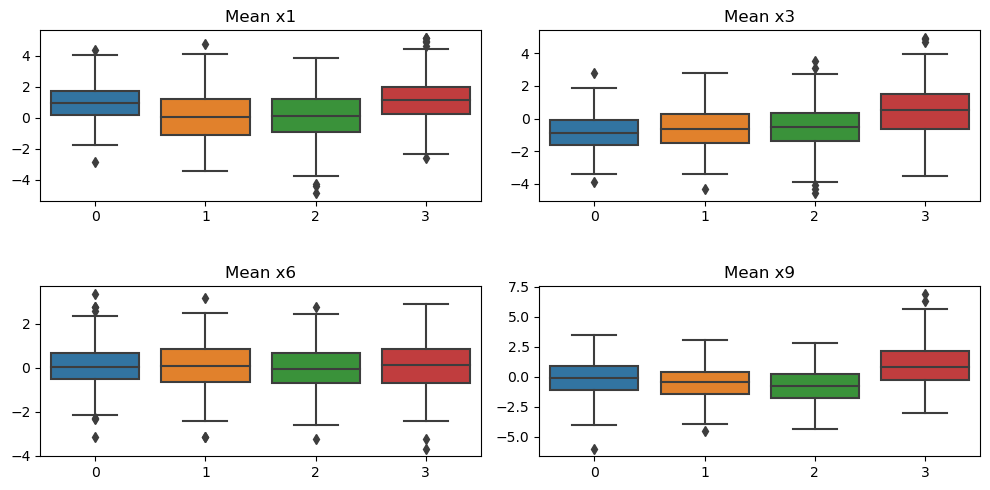

In [41]:
fig, axes = mat.subplots(2, 2, figsize=(10,5), dpi = 100)

def Boxplot(axes, data, x, y, title):
    sea.boxplot(ax=axes, data=data, x=x, y=y)
    axes.set_xlabel(None)
    axes.set_ylabel(None)
    axes.set_title(title)

Boxplot(axes[0,0], numbers, "classes", 'x1', "Mean x1")
Boxplot(axes[0,1], numbers, "classes", 'x3', "Mean x3")
Boxplot(axes[1,0], numbers, "classes", 'x6', "Mean x6")
Boxplot(axes[1,1], numbers, "classes", 'x9', "Mean x9")


mat.tight_layout()
mat.subplots_adjust(hspace=0.5)

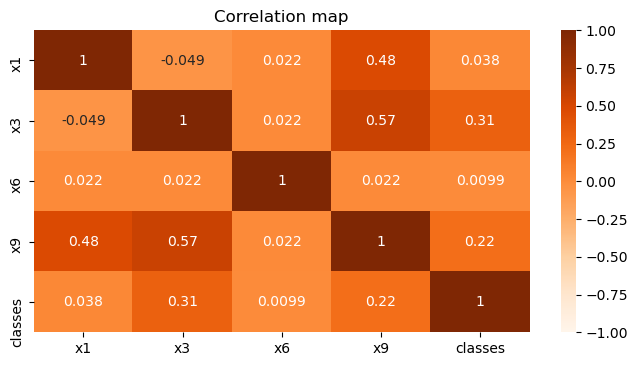

In [42]:
mat.figure(figsize = (8, 4), dpi = 100)
sea.heatmap(numbers.corr(), annot = True, cmap = "Oranges", vmin = -1, vmax = 1)
mat.title("Correlation map")
mat.show()

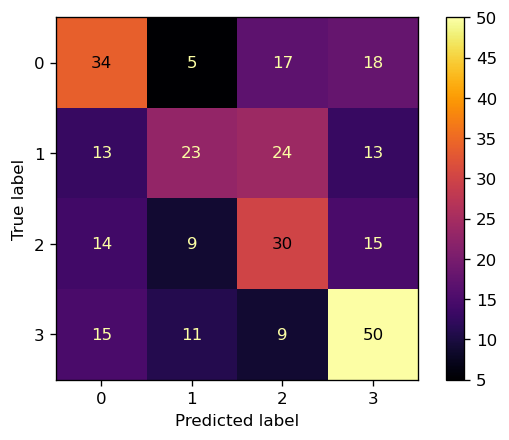

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report


x = numbers.drop("classes", axis = 1)
y = numbers["classes"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

scaler = StandardScaler()
log_model = LogisticRegression()

Scaled_x_train = scaler.fit_transform(x_train)
Scaled_x_test = scaler.transform(x_test)
log_model.fit(Scaled_x_train, y_train)
y_pred = log_model.predict(Scaled_x_test)

confusion_matrix(y_test, y_pred)

fig, ax = mat.subplots(dpi = 120)
plot_confusion_matrix(log_model, Scaled_x_test, y_test, ax = ax, cmap="inferno");

In [44]:
score = accuracy_score(y_test, y_pred)
round(score, 2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.46      0.45        74
           1       0.48      0.32      0.38        73
           2       0.38      0.44      0.41        68
           3       0.52      0.59      0.55        85

    accuracy                           0.46       300
   macro avg       0.46      0.45      0.45       300
weighted avg       0.46      0.46      0.45       300

